# DATA MINING (COMP-541) PROJECT - 2
## Name : Chinmay Shukla
## Student ID : 202727453

In [1]:
# Importing required libraries for the operations

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve



## _STEP 1_

In [2]:
df = pd.read_csv(r"C:\Users\Chinmay\Desktop\COMP 541\cleaned1.csv")    # reading the updated dataset from Project1
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,2,2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
1,1,6,6,53882,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
2,2,7,7,10434,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
3,3,8,8,27419,0,59.0,0,0,1,2,0,76.15,27.720748,0,1
4,4,9,9,60491,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [3]:
a = df.iloc[:, :-1]
b = df.iloc[:, -1]

# testing = 20% ; testing = 80%
# splitting the dataset using training and testing

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.1, random_state=42) 

#### Creating a subset of the dataframe

In [4]:
df_subset = pd.read_csv(r"C:\Users\Chinmay\Desktop\COMP 541\cleaned1.csv")
df_subset.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,2,2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
1,1,6,6,53882,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
2,2,7,7,10434,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
3,3,8,8,27419,0,59.0,0,0,1,2,0,76.15,27.720748,0,1
4,4,9,9,60491,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [5]:
a1 = df.iloc[:, :-1]
b1 = df.iloc[:, -1]

# testing = 20% ; testing = 80%
# splitting the dataset using training and testing

a1_train, a1_test, b1_train, b1_test = train_test_split(a1, b1, test_size=0.2, random_state=42) 

In [6]:
# Dataframe for stroke == 1

df_stroke = df_subset[df_subset['stroke'] == 1] 
print(df_stroke.head())

   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1     id  gender   age  \
0           0             2               2  31112       1  80.0   
1           1             6               6  53882       1  74.0   
2           2             7               7  10434       0  69.0   
3           3             8               8  27419       0  59.0   
4           4             9               9  60491       0  78.0   

   hypertension  heart_disease  ever_married  work_type  Residence_type  \
0             0              1             1          2               0   
1             1              1             1          2               0   
2             0              0             0          2               1   
3             0              0             1          2               0   
4             0              0             1          2               1   

   avg_glucose_level        bmi  smoking_status  stroke  
0             105.92  32.500000               2       1  
1              70.09  27

In [7]:
# Dataframe for stroke == 0

df_no_stroke = df_subset[df_subset['stroke'] == 0].sample(n=200, random_state=42)
print(df_no_stroke.head())

      Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1     id  gender   age  \
762          762           976             976  52549       1  59.0   
3767        3767          4564            4564  25476       0  52.0   
1633        1633          2019            2019  66546       0  20.0   
2724        2724          3328            3328  42348       1  72.0   
565          565           751             751  25595       0  58.0   

      hypertension  heart_disease  ever_married  work_type  Residence_type  \
762              0              0             1          0               0   
3767             0              0             1          2               1   
1633             0              0             0          2               1   
2724             0              1             1          3               1   
565              1              0             1          2               1   

      avg_glucose_level   bmi  smoking_status  stroke  
762               88.81  38.0               1   

In [8]:
# I used a smaller sample of the larger data for 0 values to balance using SMOTE

df_concat= pd.concat([df_stroke, df_no_stroke], axis=0)
df_concat.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,2,2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
1,1,6,6,53882,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
2,2,7,7,10434,0,69.0,0,0,0,2,1,94.39,22.800000,2,1
3,3,8,8,27419,0,59.0,0,0,1,2,0,76.15,27.720748,0,1
4,4,9,9,60491,0,78.0,0,0,1,2,1,58.57,24.200000,0,1


In [9]:
# calculate aggregated values for the generated groups

df_combined = df_concat.groupby('stroke').size().reset_index(name='count')

print(df_combined)

   stroke  count
0       0    200
1       1    157


In [10]:
a = df_concat.iloc[:, :-1]
b = df_concat.iloc[:, -1]
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.1, random_state=42)

In [11]:
# Checking data balance before standardizing 

import collections
total = collections.Counter(b_train)
print("Before standardizing", total)

Before standardizing Counter({0: 182, 1: 139})


In [12]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)


In [13]:
# As the dataset is imbalanced, I solved this problem by using SMOTE.
# SMOTE works by selecting pair of minority class observations and then creating a synthetic point that lies on the line connecting these two

sm = SMOTE(random_state=42)
a_train_resampled, b_train_resampled = sm.fit_resample(a_train, b_train)


In [14]:
#Checking data balance after standardizing

total = collections.Counter(b_train_resampled)
print("After standardizing", total)

After standardizing Counter({1: 182, 0: 182})


## _STEP 2_

### _Logistic Regression Model_

In [15]:
# Declaring model for Logictic Regression

Logistic_regression_model = LogisticRegression()

In [16]:
# Building the model for Logisitic Regression using training dataset

Logistic_regression_model.fit(a_train_resampled, b_train_resampled)

LogisticRegression()

### _Naive Bayes Model_

In [17]:
# Declaring model for Naive Bayes

Naive_Bayes_model = GaussianNB()

In [18]:
# Building the model for Naive Bayes using training dataset

Naive_Bayes_model.fit(a_train_resampled, b_train_resampled)

GaussianNB()

### _K Nearest Neighbor Classifier Model_

In [19]:
# Declaring model for K Nearest Neighbor classifier

KNN_Classifier_model = KNeighborsClassifier(n_neighbors=5)

In [20]:
# Building the model for K Nearest Neighbor Classifier using training dataset

KNN_Classifier_model.fit(a_train_resampled, b_train_resampled)

KNeighborsClassifier()

### _Support Vector Machine Model_

In [21]:
# Declaring model for Support Vector Machine Model

SVC_Model = SVC(kernel='linear', C=1, random_state=42)

In [22]:
# Building the model for Support Vector Machine using training dataset

SVC_Model.fit(a_train_resampled, b_train_resampled)

SVC(C=1, kernel='linear', random_state=42)

## _STEP 3_

### _Evaluating performance of Logistic Regression Model_

In [23]:
b_logistic_regression_prediction = Logistic_regression_model.predict(a1_test)

# Calculating accuracy score
Logistic_regression_accuracy = accuracy_score(b1_test, b_logistic_regression_prediction)

# Calculating F1 score
Logistic_regression_f1 = f1_score(b1_test, b_logistic_regression_prediction)

Logistic_regression_probs = Logistic_regression_model.predict_proba(a1_test)[:, 1]
Logistic_regression_auc = roc_auc_score(b1_test, Logistic_regression_probs)
Logistic_regression_fpr, Logistic_regression_tpr, Logistic_regression_thresholds = roc_curve(b1_test, Logistic_regression_probs)

C:\Users\Chinmay\Anaconda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\Chinmay\Anaconda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### _Evaluating performance of Naive Bayes Model_

In [24]:
b_naive_bayes_prediction = Naive_Bayes_model.predict(a1_test)

# Calculating accuracy score
naive_bayes_accuracy = accuracy_score(b1_test, b_naive_bayes_prediction)

# Calculating F1 score
naive_bayes_f1 = f1_score(b1_test, b_naive_bayes_prediction)

Naive_Bayes_probs = Naive_Bayes_model.predict_proba(a1_test)[:, 1]
Naive_Bayes_auc = roc_auc_score(b1_test, Naive_Bayes_probs)
Naive_Bayes_fpr, Naive_Bayes_tpr, Naive_Bayes_thresholds = roc_curve(b1_test, Naive_Bayes_probs)

C:\Users\Chinmay\Anaconda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\Chinmay\Anaconda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


### _Evaluating performance of K Nearest Neighbor Classifier Model_

In [25]:
b_knn_prediction = KNN_Classifier_model.predict(a1_test)

# Calculating accuracy score
knn_accuracy = accuracy_score(b1_test, b_knn_prediction)


# Calculating F1 score
knn_f1 = f1_score(b1_test, b_knn_prediction)

knn_probs = KNN_Classifier_model.predict_proba(a1_test)[:, 1]
knn_auc = roc_auc_score(b1_test, knn_probs)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(b1_test, knn_probs)

C:\Users\Chinmay\Anaconda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\Chinmay\Anaconda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


### _Evaluating performance of Support Vector Machine Model_

In [26]:
b_SVC_prediction = SVC_Model.predict(a1_test)

# Calculating accuracy score
svc_accuracy = accuracy_score(b1_test, b_SVC_prediction)

# Calculating F1 score
svc_f1 = f1_score(b1_test, b_SVC_prediction)

svc_probs = SVC_Model.decision_function(a1_test)
svc_auc = roc_auc_score(b1_test, svc_probs)
svc_fpr, svc_tpr, svc_thresholds = roc_curve(b1_test, svc_probs)

C:\Users\Chinmay\Anaconda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Chinmay\Anaconda\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


#### _RESULTS FOR LOGISTIC REGRESSION MODEL_ : 

In [27]:
print("Accuracy: {:.4f}".format(Logistic_regression_accuracy))
print("F1 Score: {:.4f}".format(Logistic_regression_f1))
print("AUC-ROC Score: {:.4f}".format(Logistic_regression_auc))

Accuracy: 0.6785
F1 Score: 0.2229
AUC-ROC Score: 0.8199


#### _RESULTS FOR NAIVE BAYES MODEL_ : 

In [28]:
print("Accuracy: {:.4f}".format(naive_bayes_accuracy))
print("F1 Score: {:.4f}".format(naive_bayes_f1))
print("AUC-ROC Score: {:.4f}".format(Naive_Bayes_auc))

Accuracy: 0.9598
F1 Score: 0.6600
AUC-ROC Score: 0.8958


#### _RESULTS FOR K NEAREST NEIGHBOR CLASSIFIER MODEL_ :

In [29]:
print("Accuracy: {:.4f}".format(knn_accuracy))
print("F1 Score: {:.4f}".format(knn_f1))
print("AUC-ROC Score: {:.4f}".format(knn_auc))

Accuracy: 0.9764
F1 Score: 0.7297
AUC-ROC Score: 0.9326


#### _RESULTS FOR SUPPORT VECTOR MACHINE CLASSIFER MODEL_ :

In [30]:
print("Accuracy: {:.4f}".format(svc_accuracy))
print("F1 Score: {:.4f}".format(svc_f1))
print("AUC-ROC Score: {:.4f}".format(svc_auc))

Accuracy: 0.8310
F1 Score: 0.3349
AUC-ROC Score: 0.9342


### *- The above comparison of all the models reveals that the accuracy of the KNN Classifier, Naive Bayes model differ very little from one another. The KNN Classifier model, however, has a little advantage over the others with a 97.64% accuracy rate.* 

### *- The F1 score was determined for each model, and upon comparison, the KNN Classifier and Naive Bayes models stand out as having high F1 scores. However, the KNN Classifier model has the advantage because its F1 score is the highest, coming in at 72.97%.* 

### *- The greatest AUC-ROC Score, 93.42%, is for Support Vector Machine. However, after comparing the performance parameters of these models we can conclude that the KNN Classifier model is well suited for this dataset.*

## _STEP 3.5_

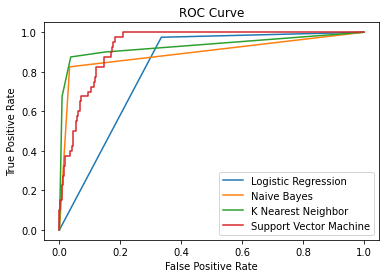

In [31]:
import matplotlib.pyplot as plt


plt.plot(Logistic_regression_fpr, Logistic_regression_tpr, label='Logistic Regression')
plt.plot(Naive_Bayes_fpr, Naive_Bayes_tpr, label='Naive Bayes')
plt.plot(knn_fpr, knn_tpr, label='K Nearest Neighbor')
plt.plot(svc_fpr, svc_tpr, label='Support Vector Machine')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

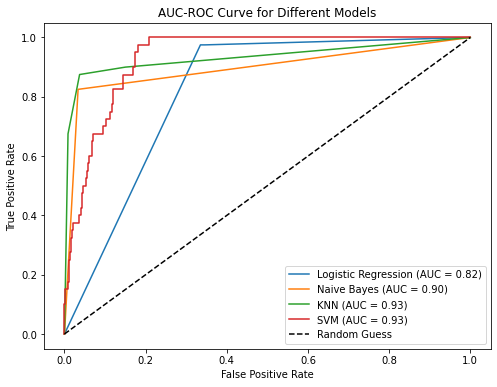

In [32]:
plt.figure(figsize=(8, 6))
plt.plot(Logistic_regression_fpr, Logistic_regression_tpr, label=f'Logistic Regression (AUC = {Logistic_regression_auc:.2f})')
plt.plot(Naive_Bayes_fpr, Naive_Bayes_tpr, label=f'Naive Bayes (AUC = {Naive_Bayes_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot(svc_fpr, svc_tpr, label=f'SVM (AUC = {svc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Different Models')
plt.legend()
plt.show()